In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import re

In [50]:
def add_whiskers(img_path, sticker_path, detector_hog, landmark_predictor):
    img_bgr = cv2.imread(img_path)
    img_bgr = cv2.resize(img_bgr, (640, 360))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rect = detector_hog(img_rgb, 1)[0]
    list_landmarks = []
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    x = list_landmarks[0][30][0]
    y = list_landmarks[0][30][1] + dlib_rect.height() // 20
    w = dlib_rect.width()
    h = dlib_rect.height()
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
    img_sticker = cv2.resize(img_sticker, (w,h), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    refined_x = x - w // 2
    refined_y = y - h // 2
    sticker_area = img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker>=[100,100,100], sticker_area, cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0))
    plt.imshow(img_rgb)
    cv2.imwrite(os.getenv('HOME')+'/AIFFEL/2021-09-30/images/Results/'+re.search(r'photo[0-9]\.jpg',image_path).group(), cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

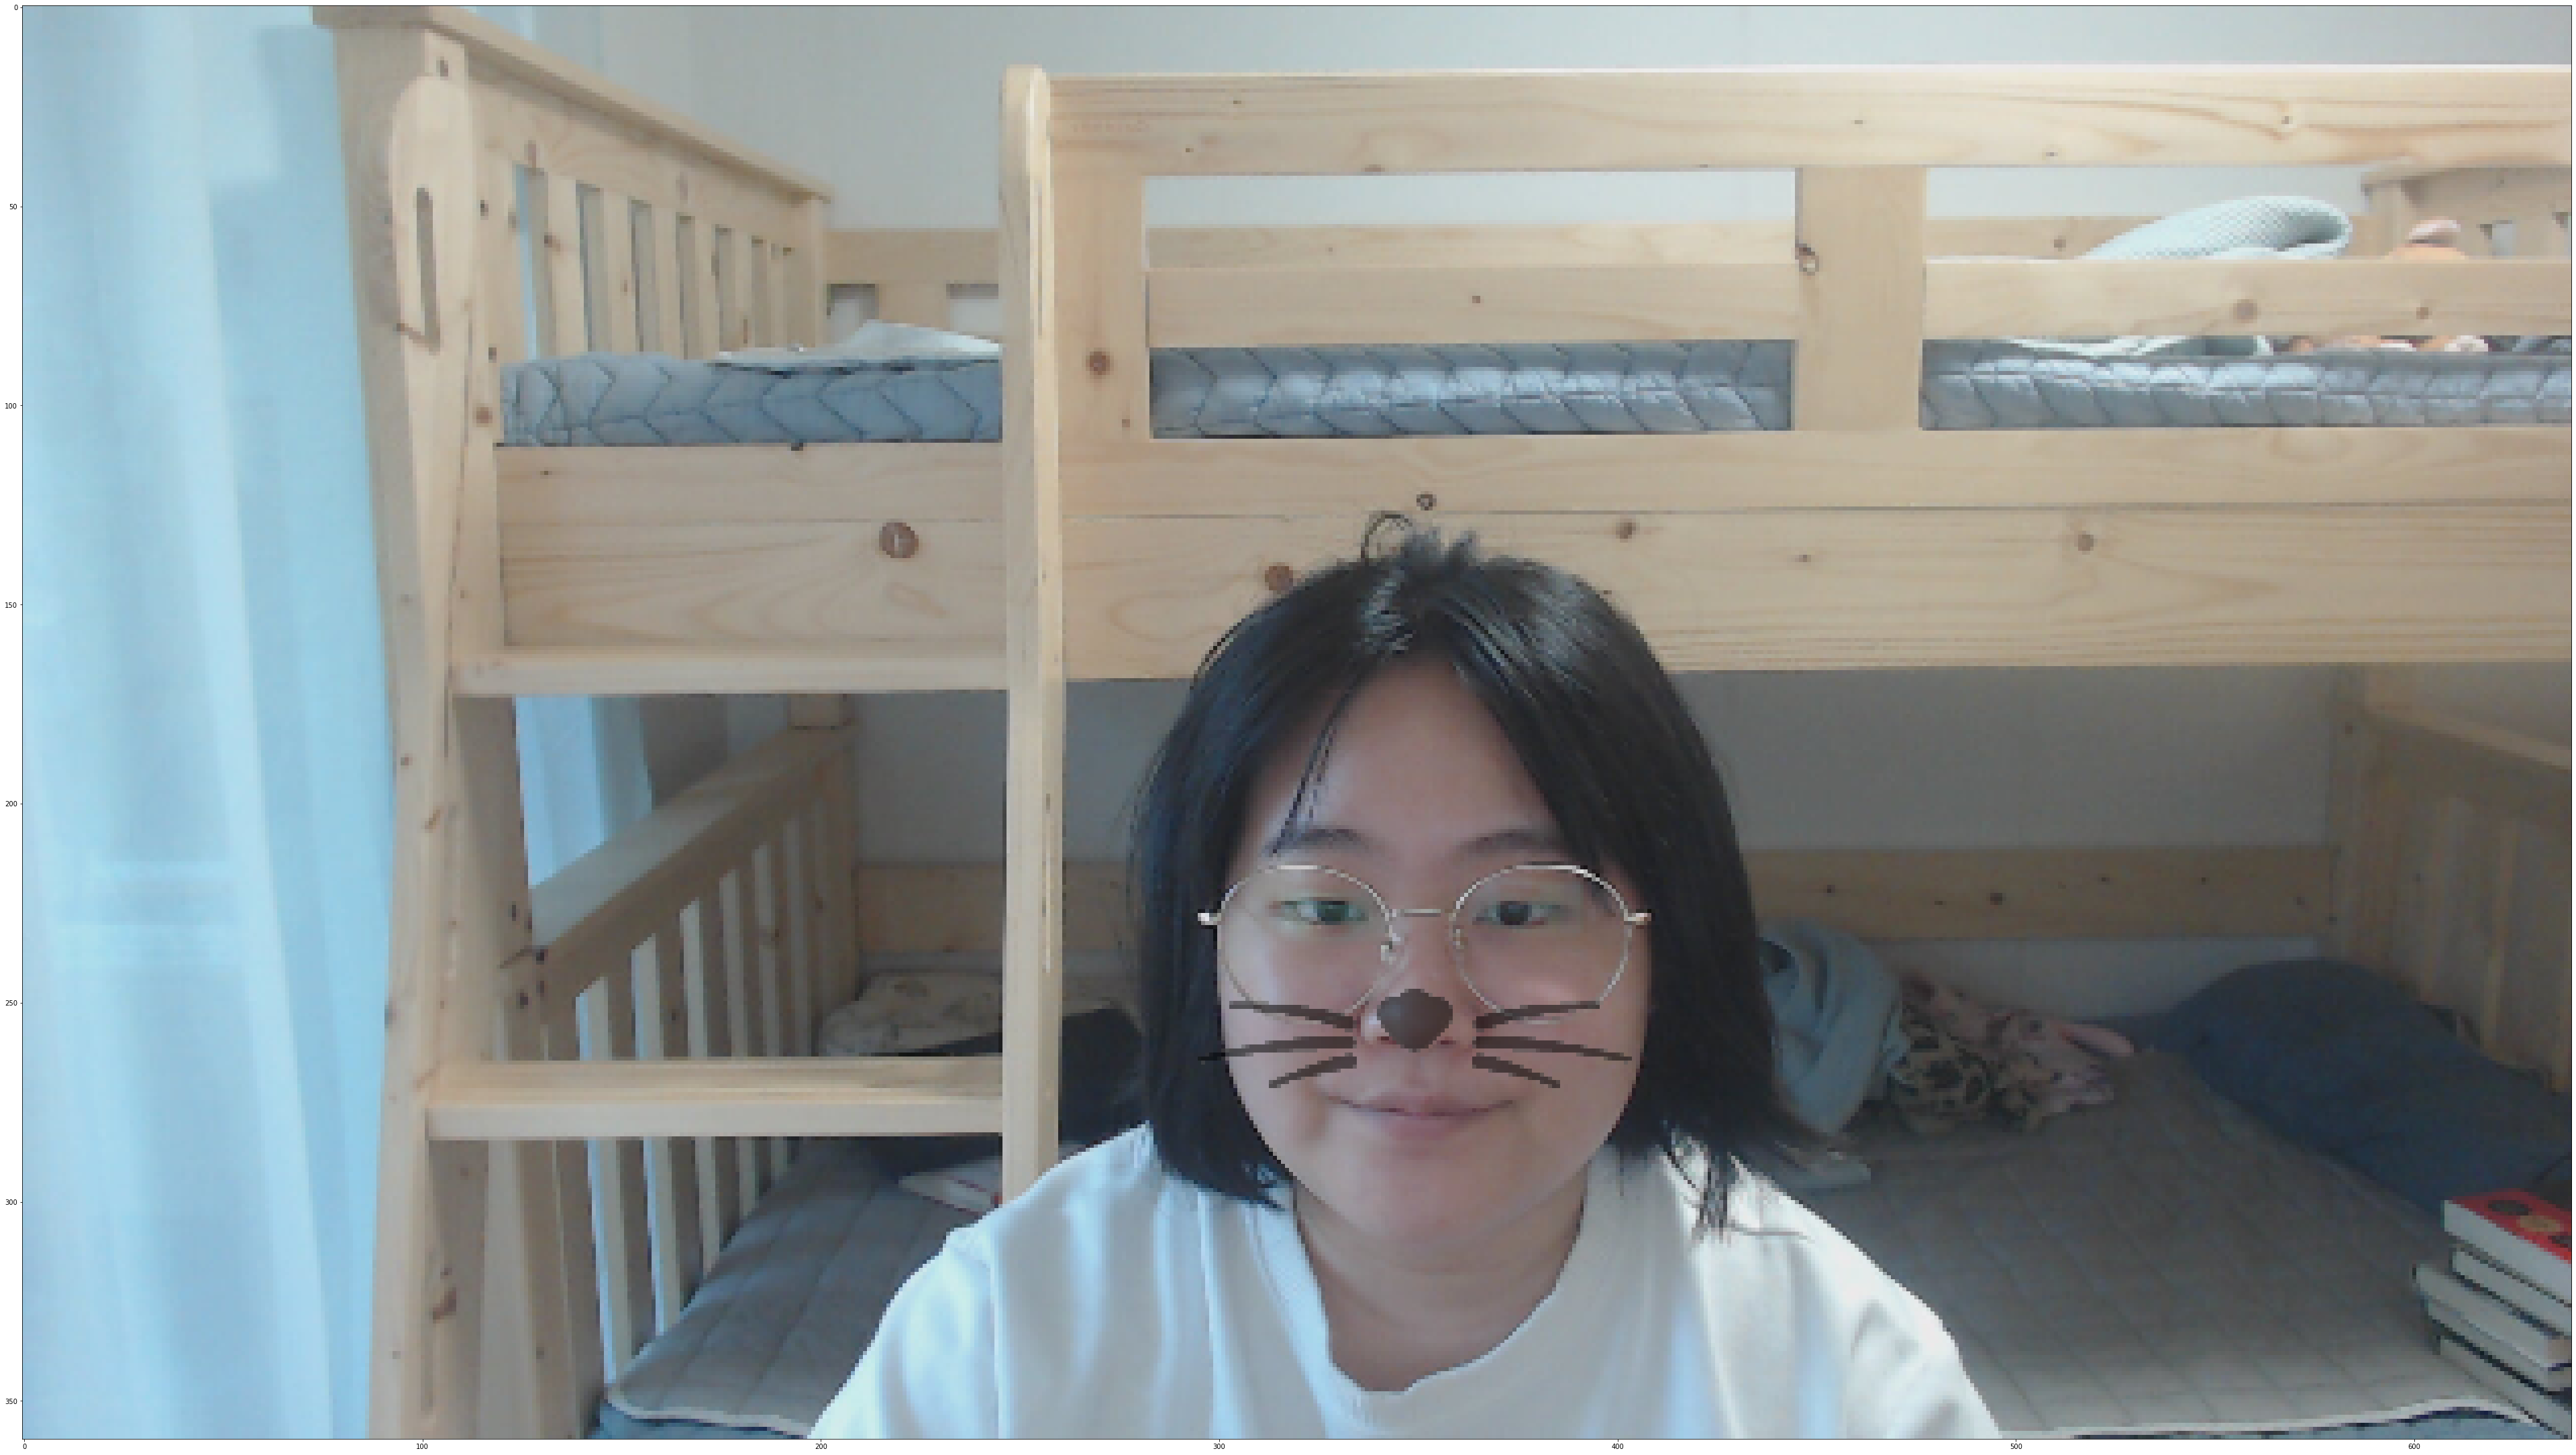

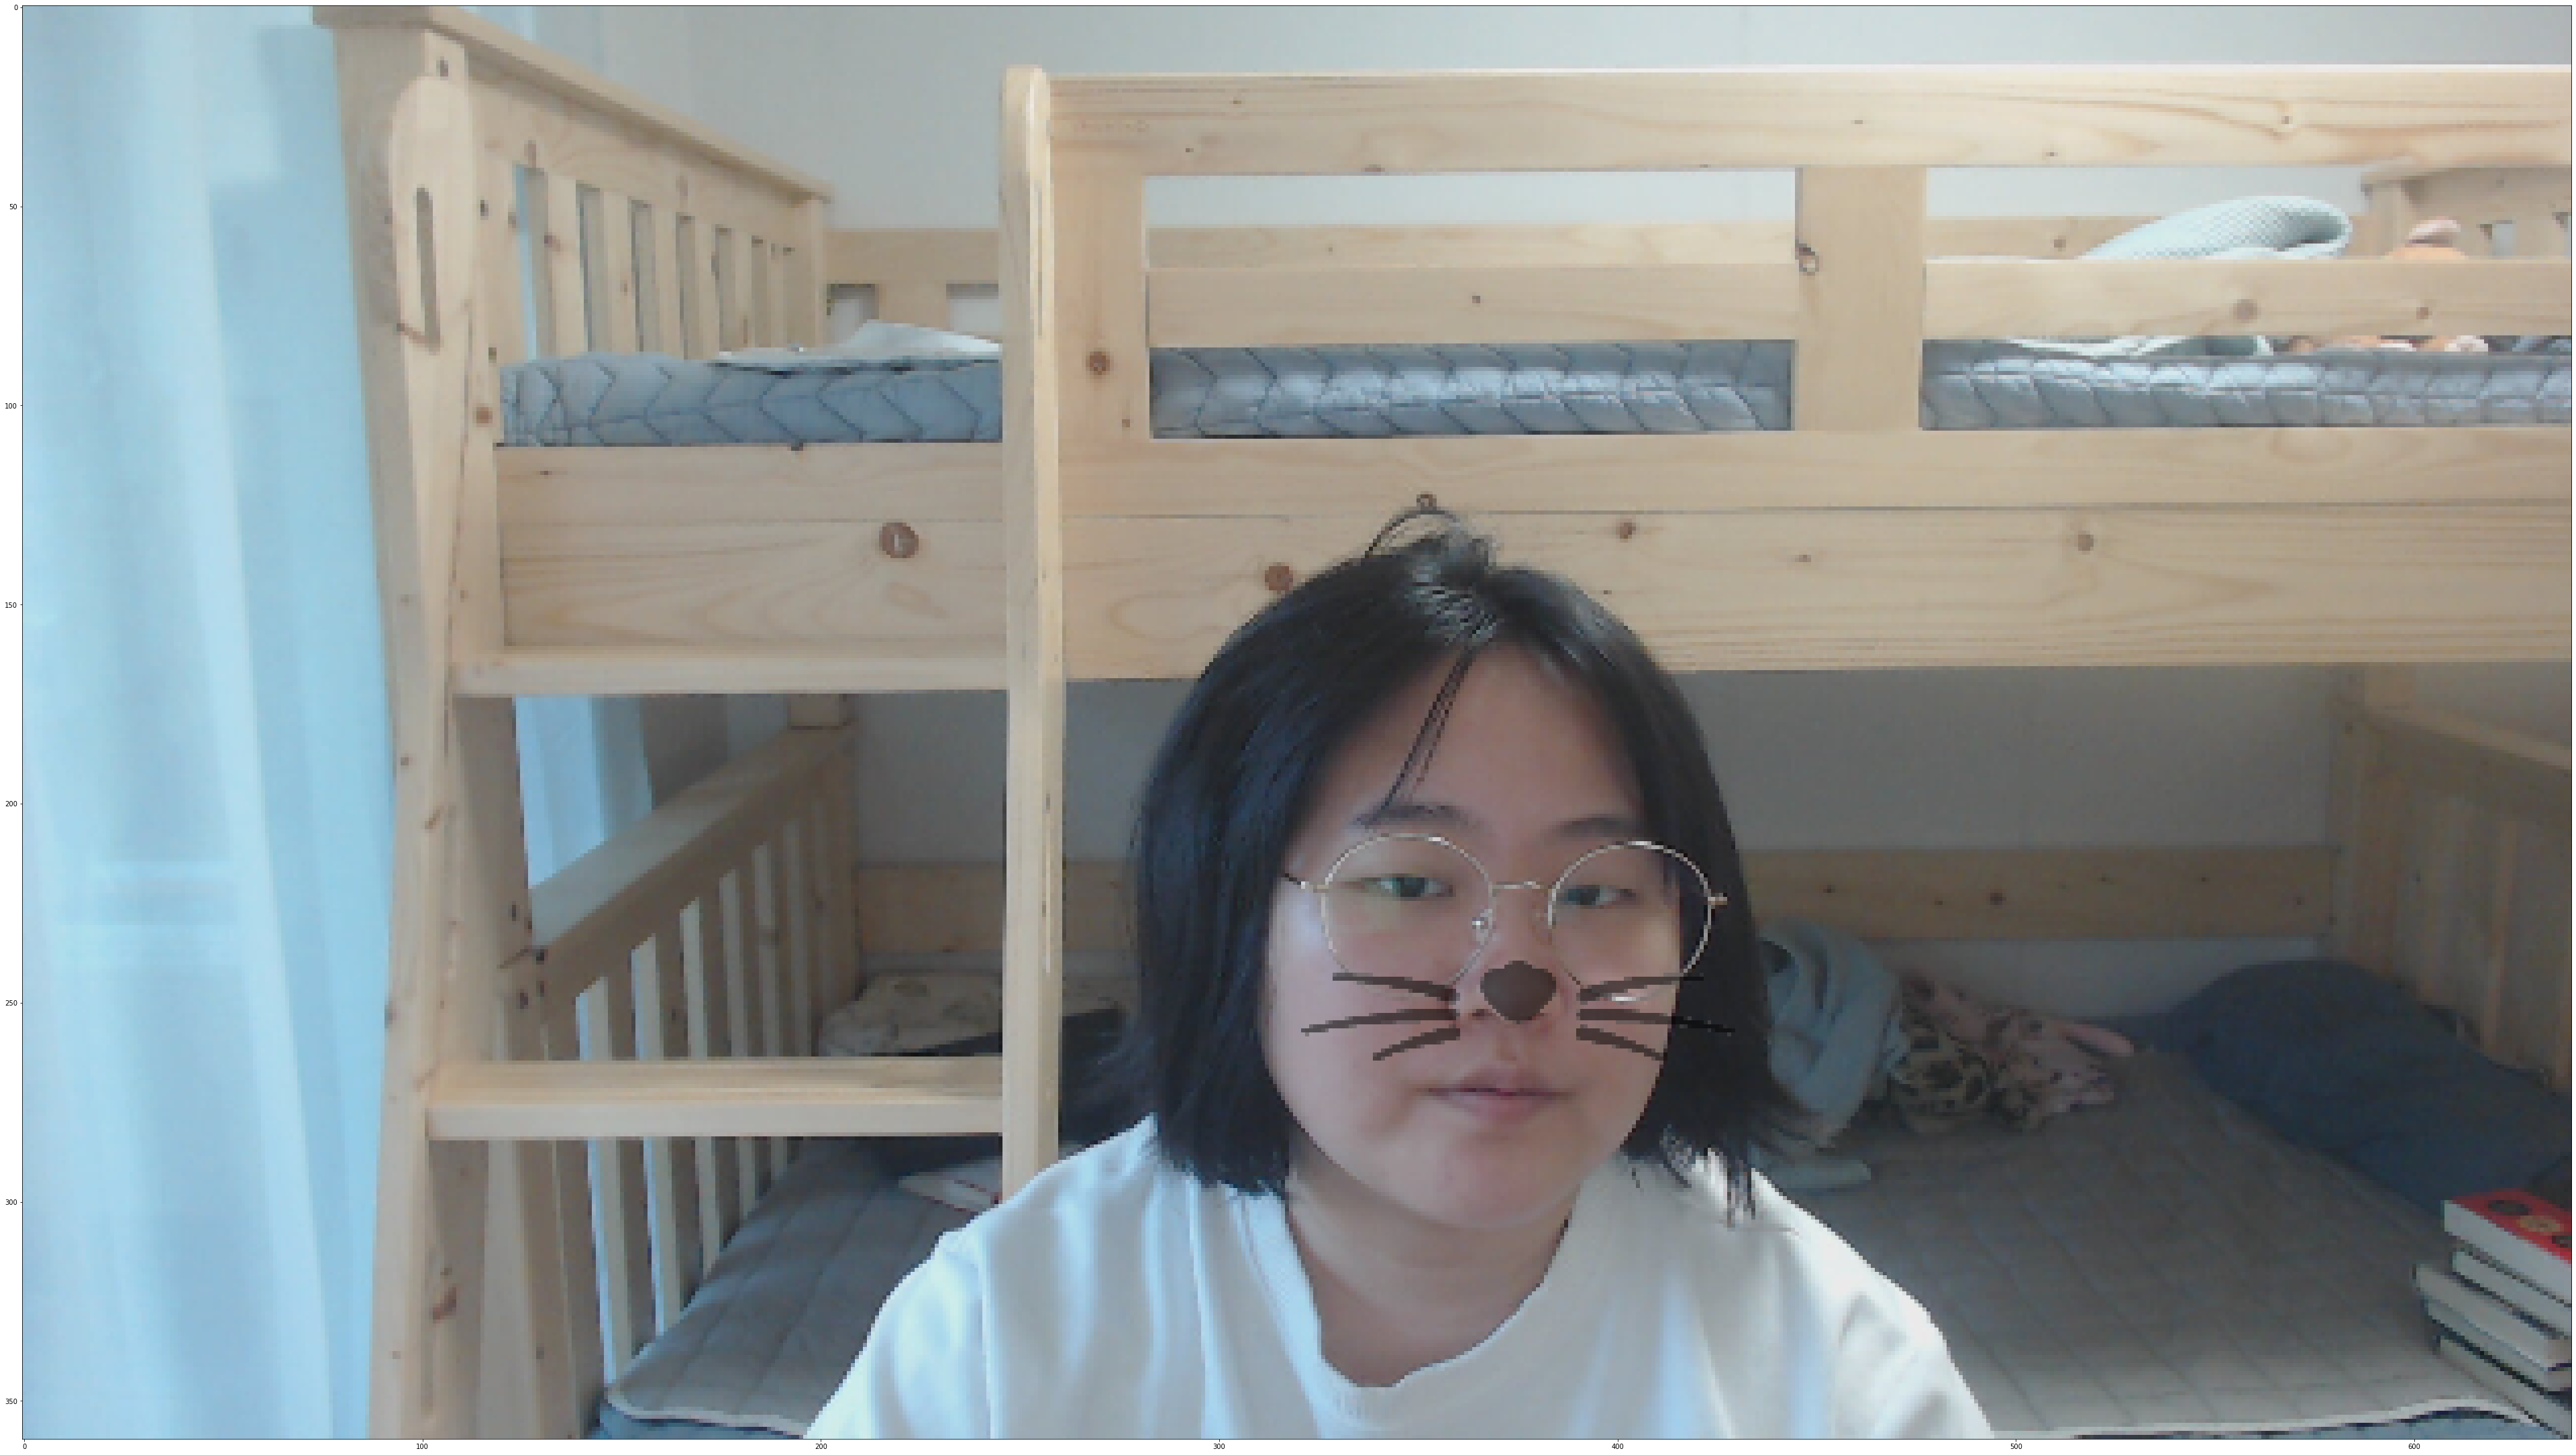

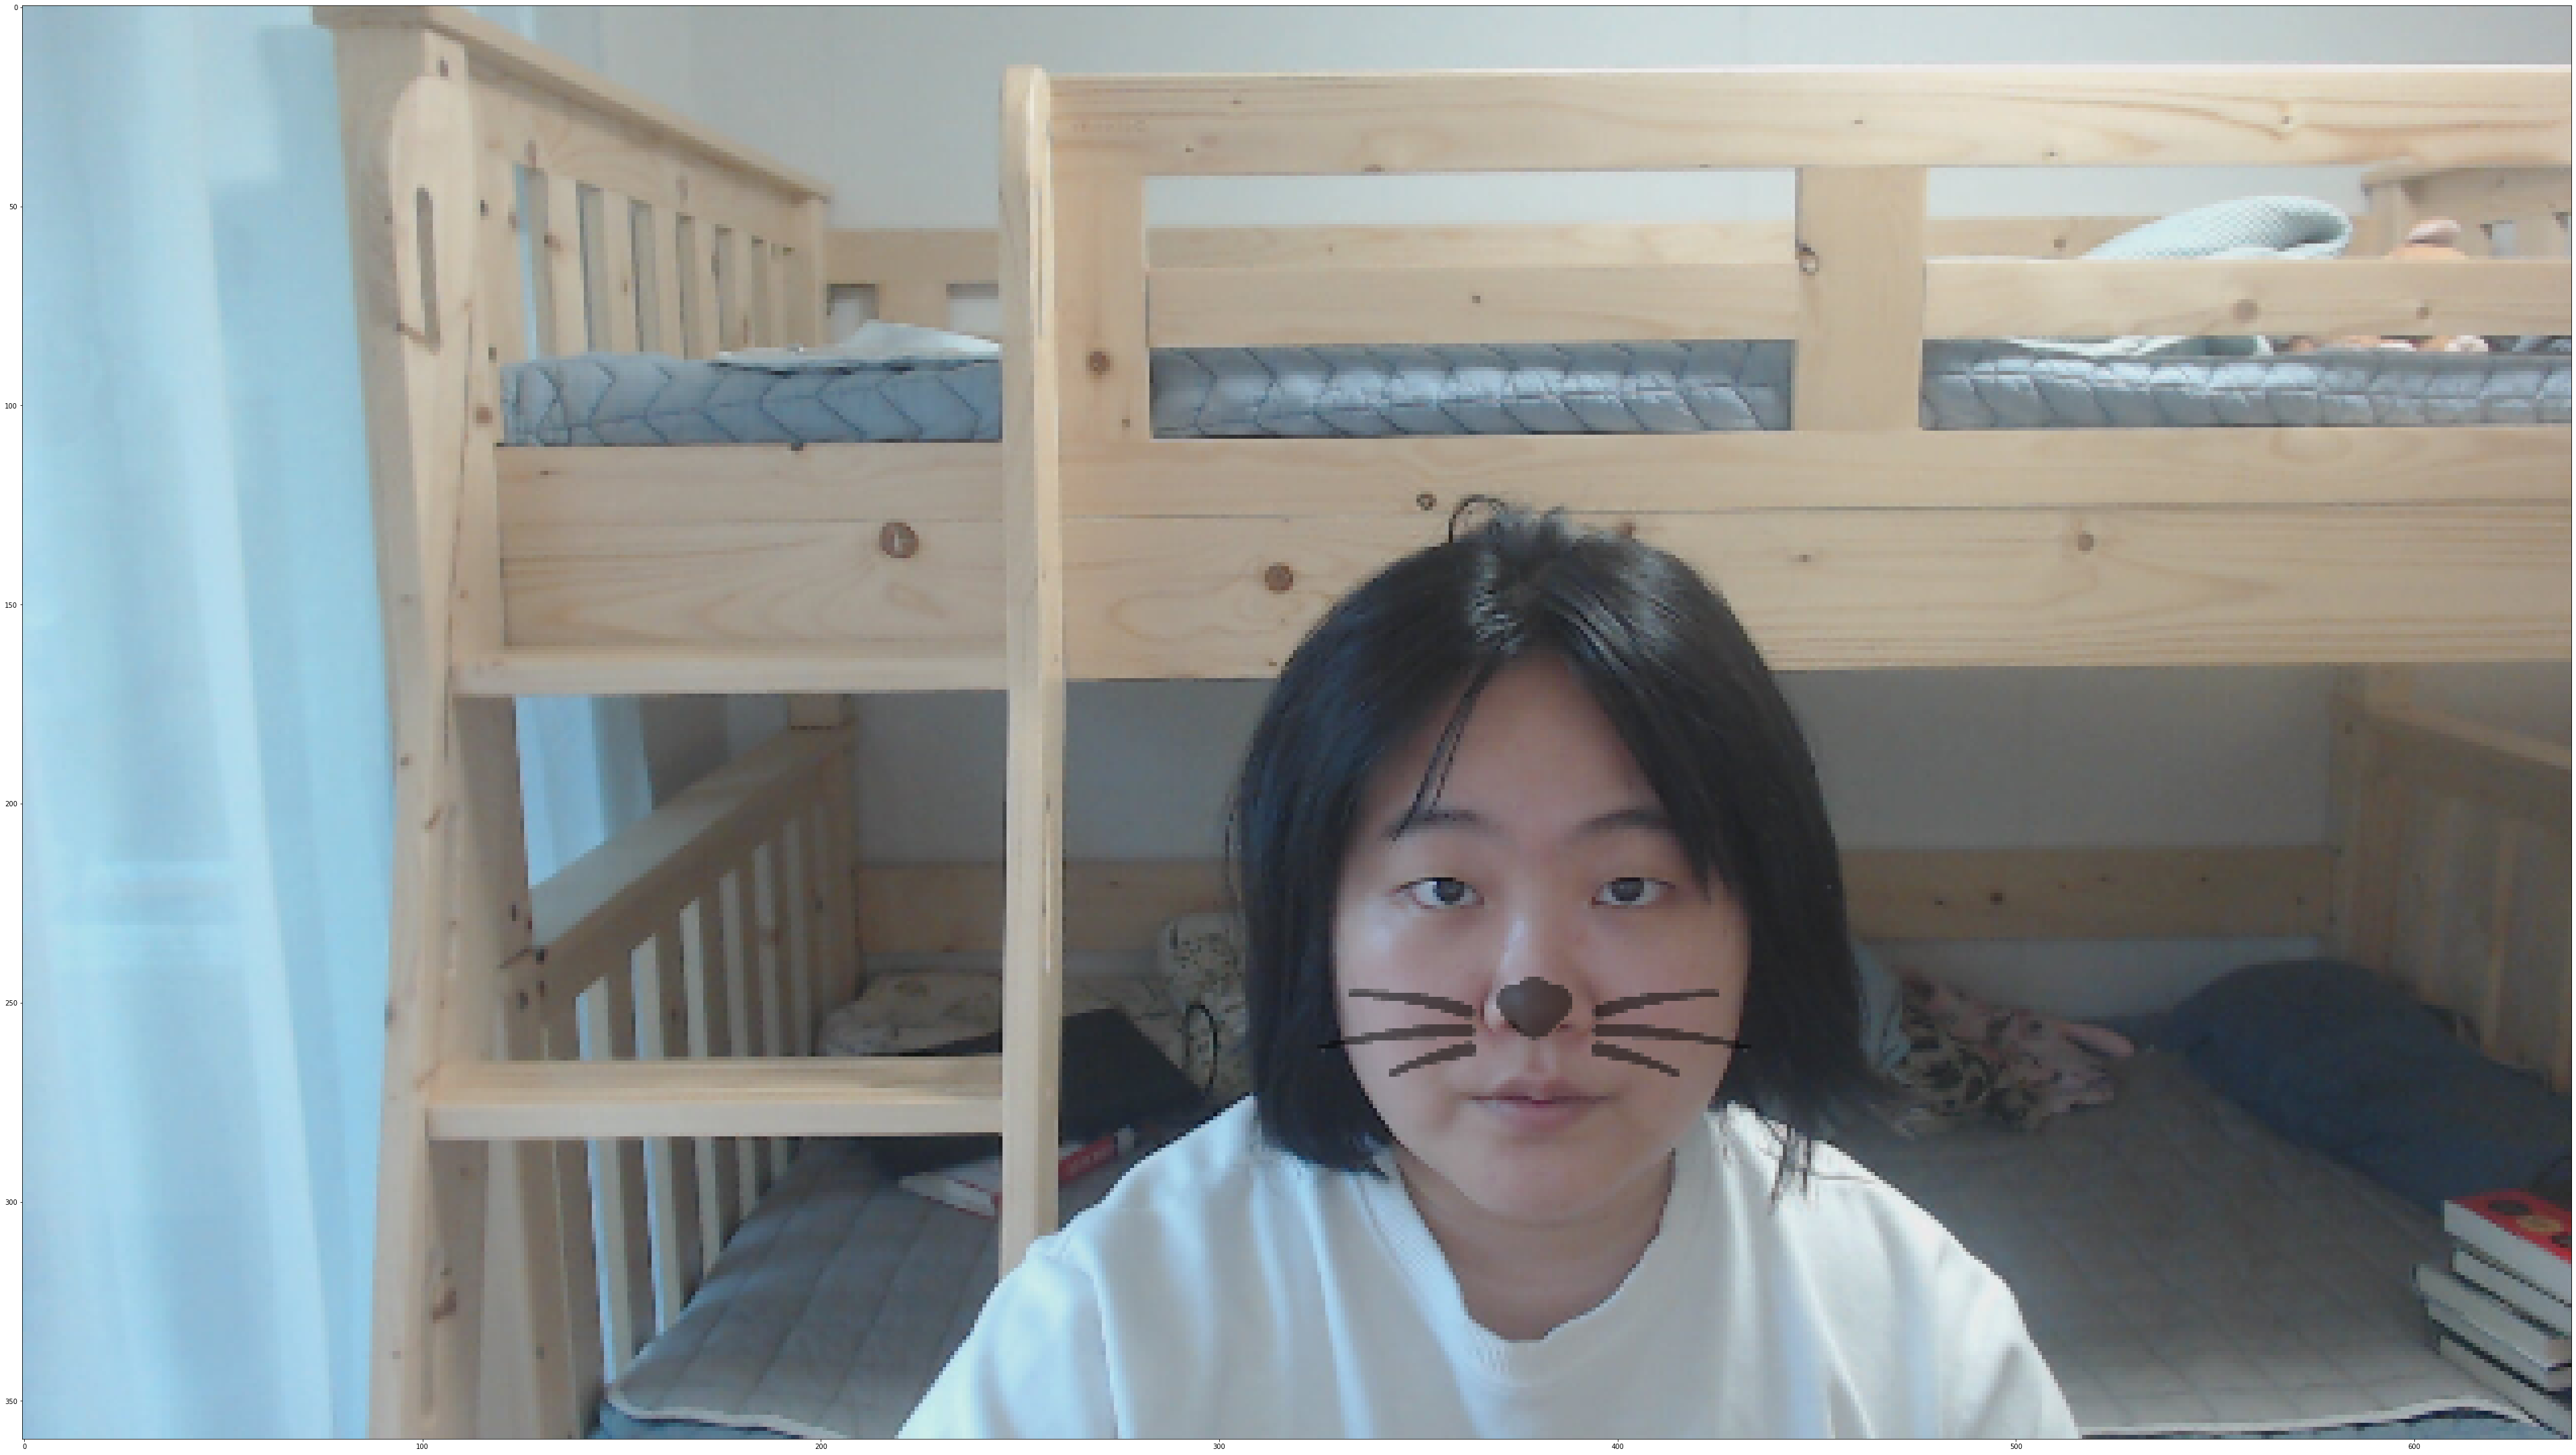

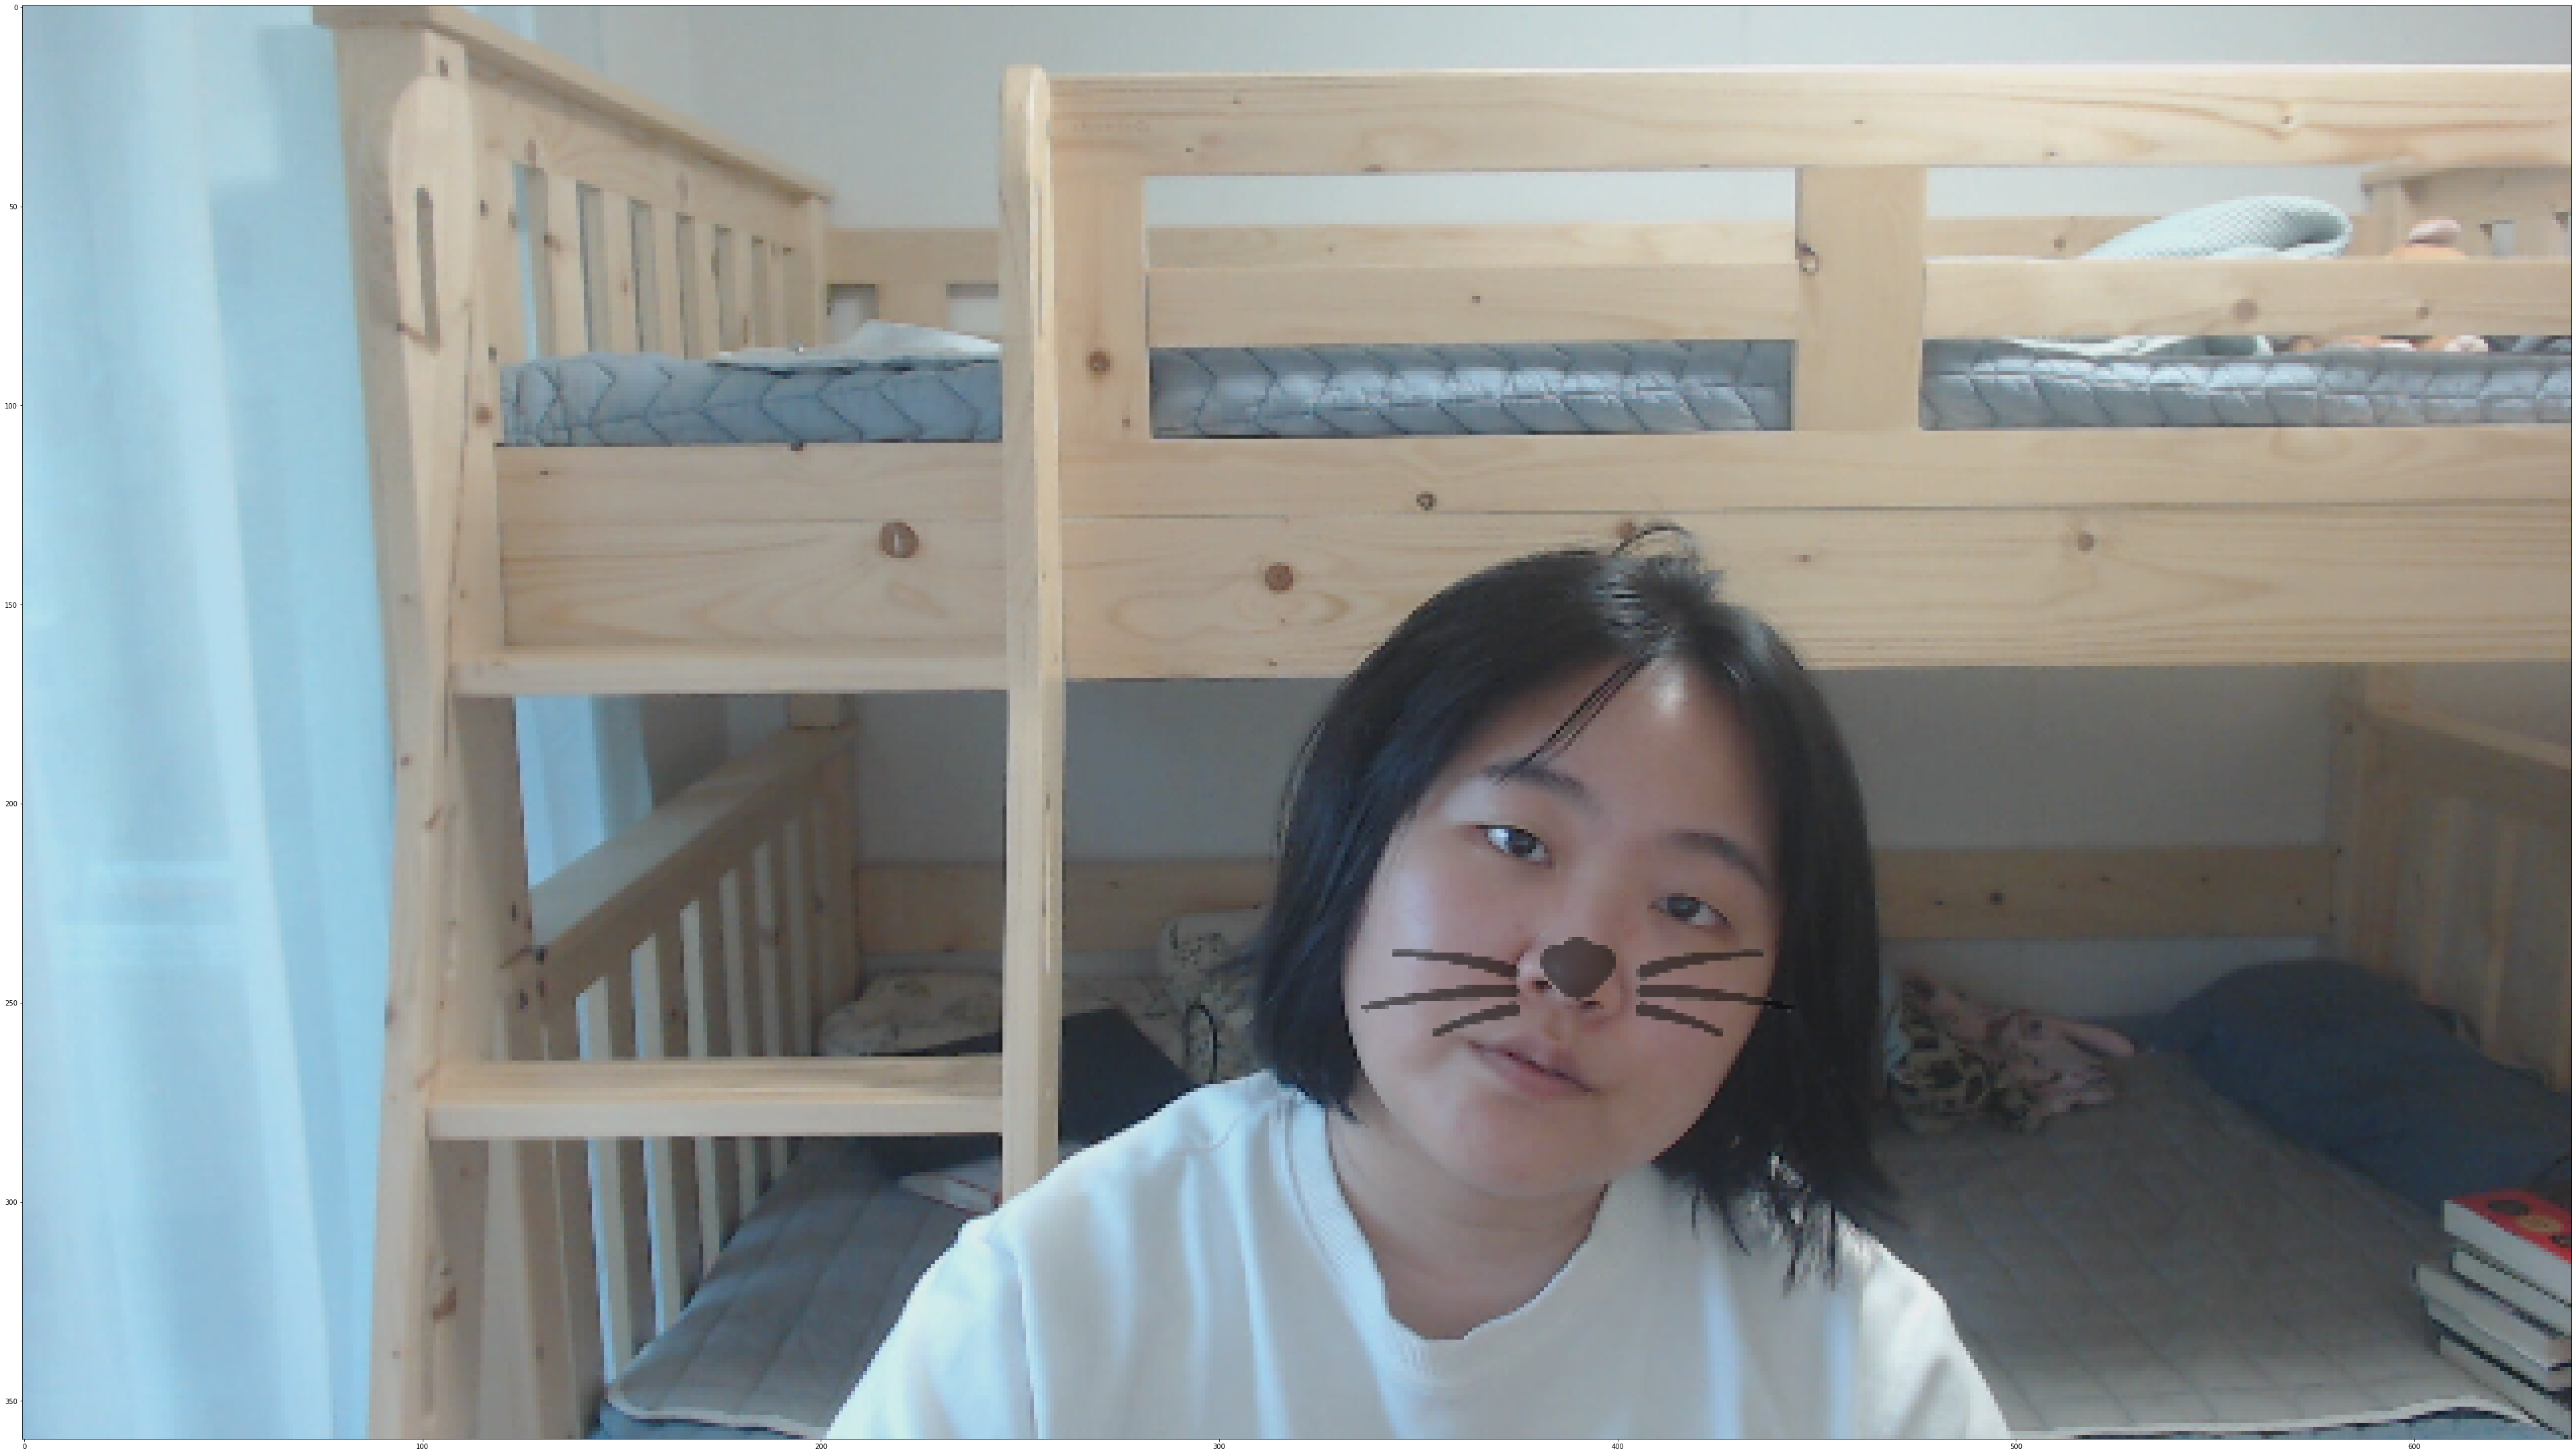

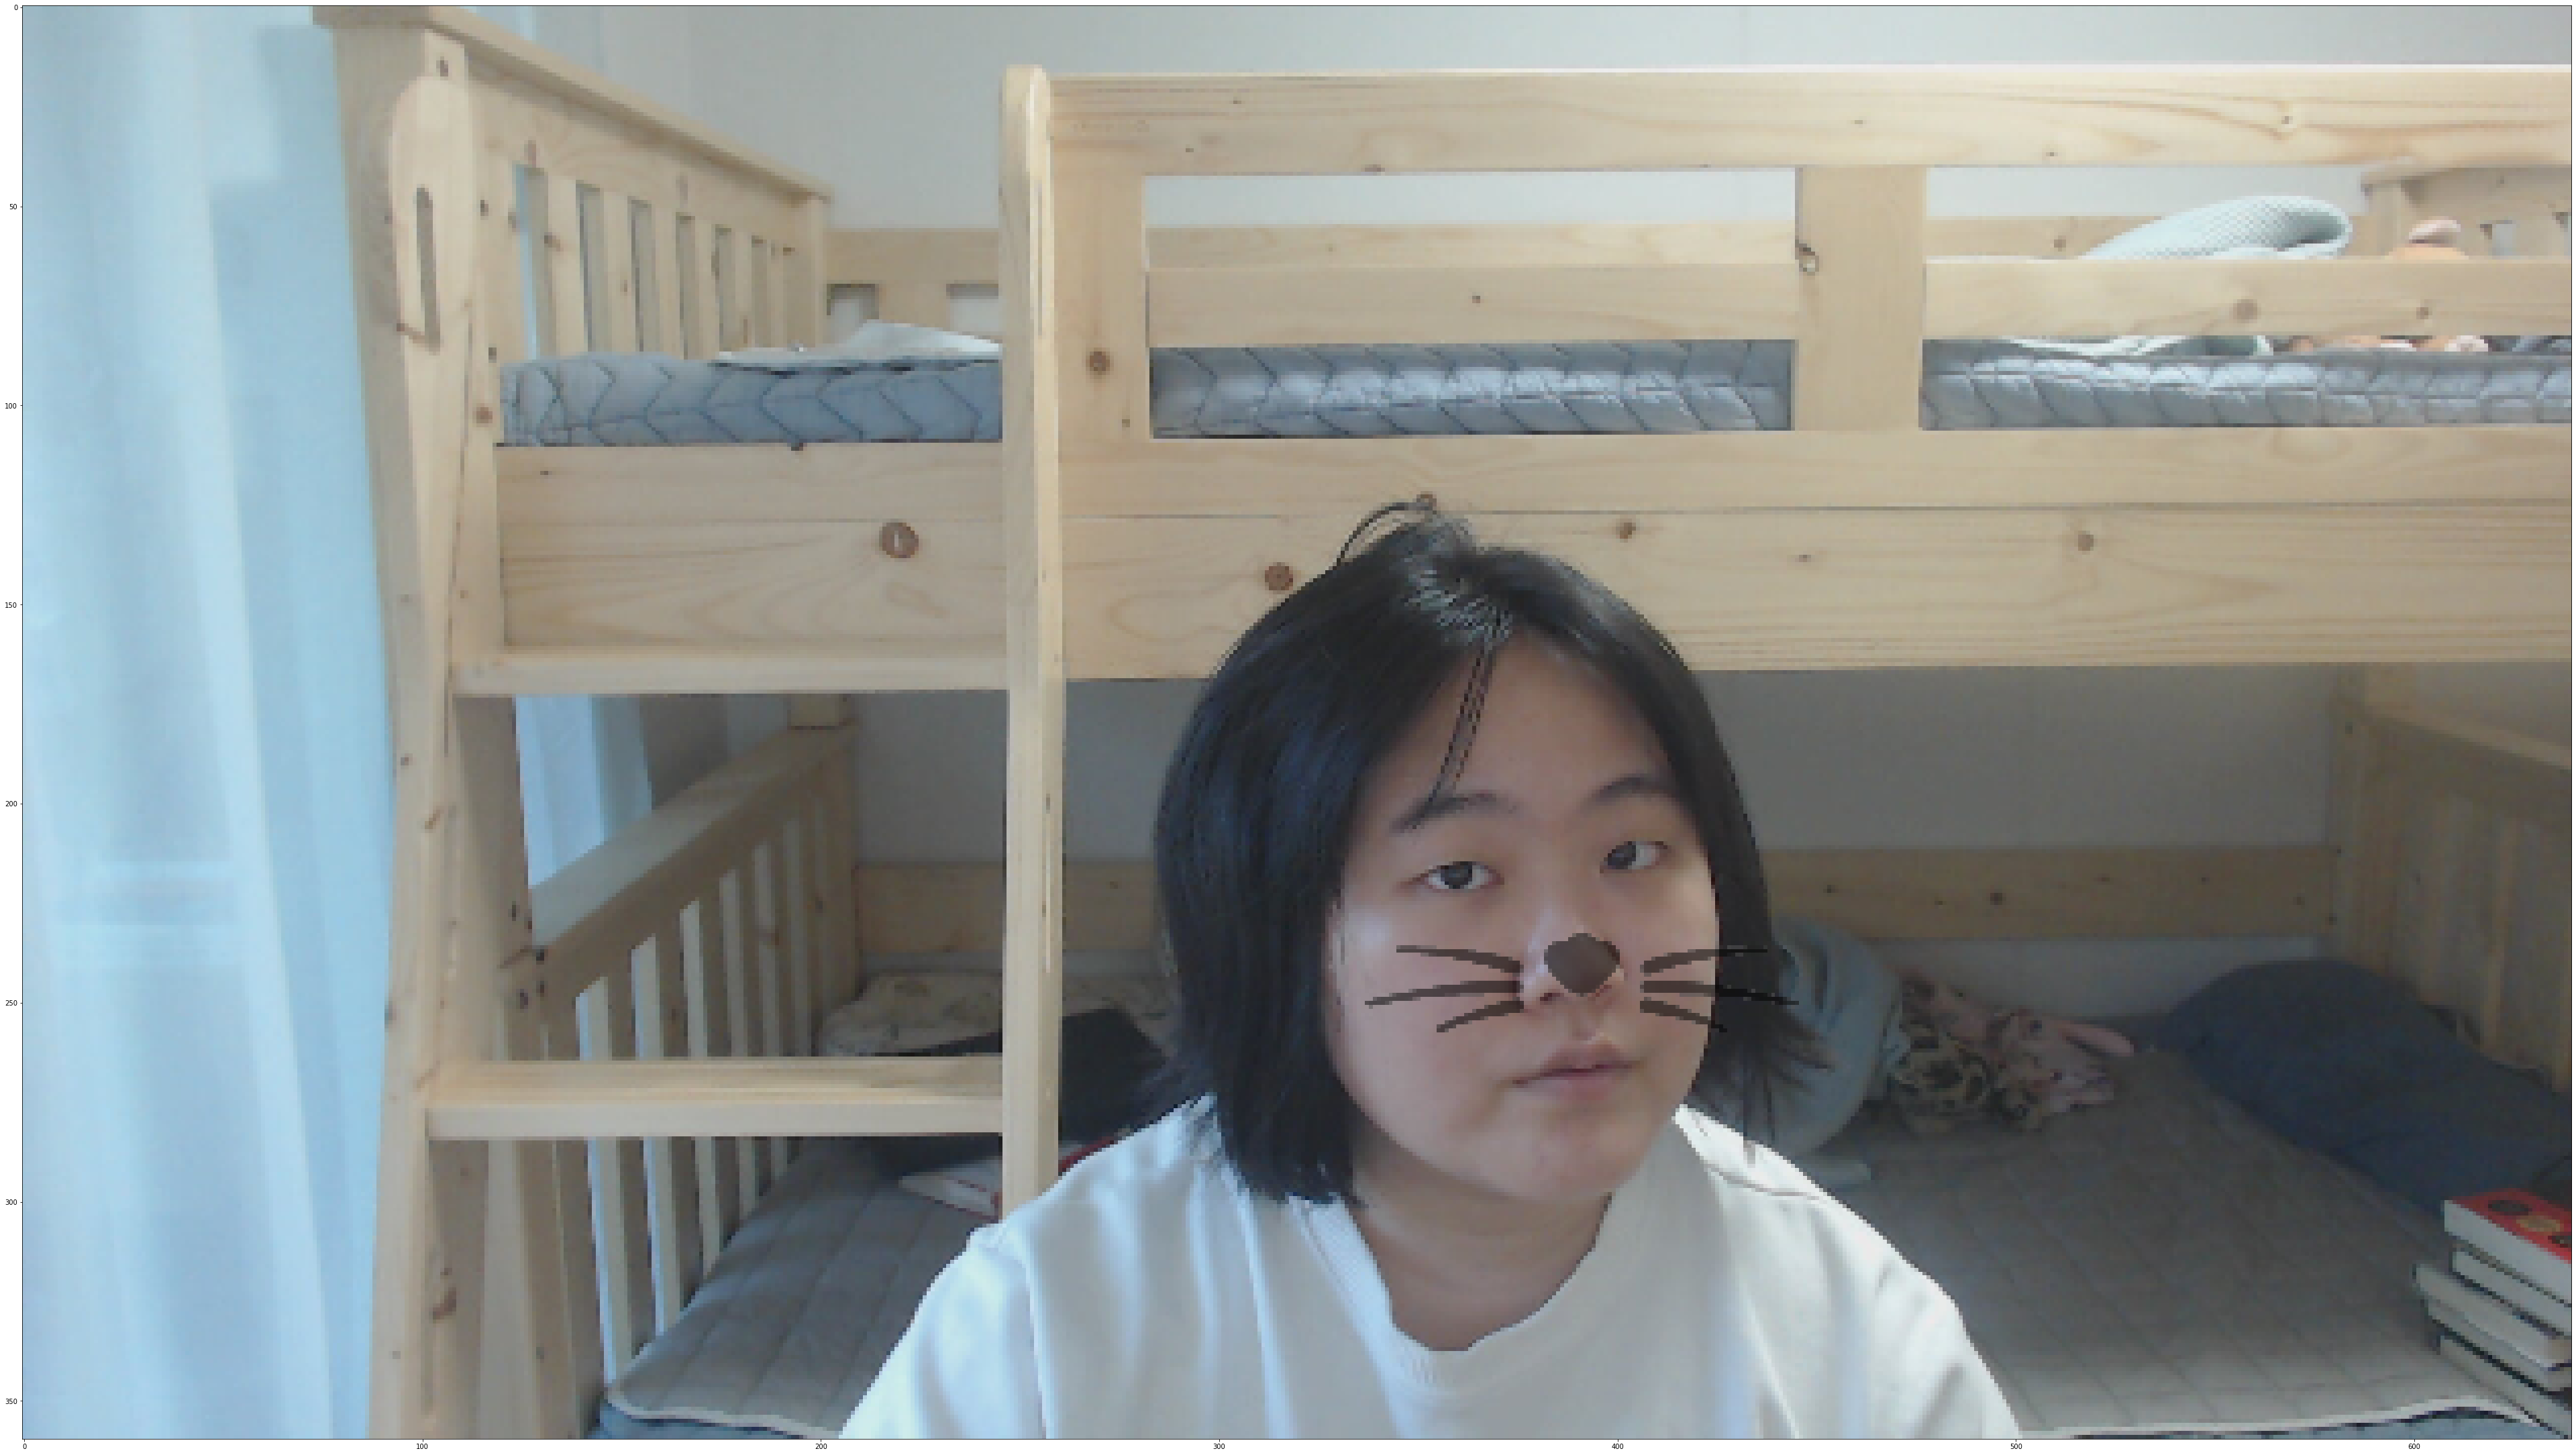

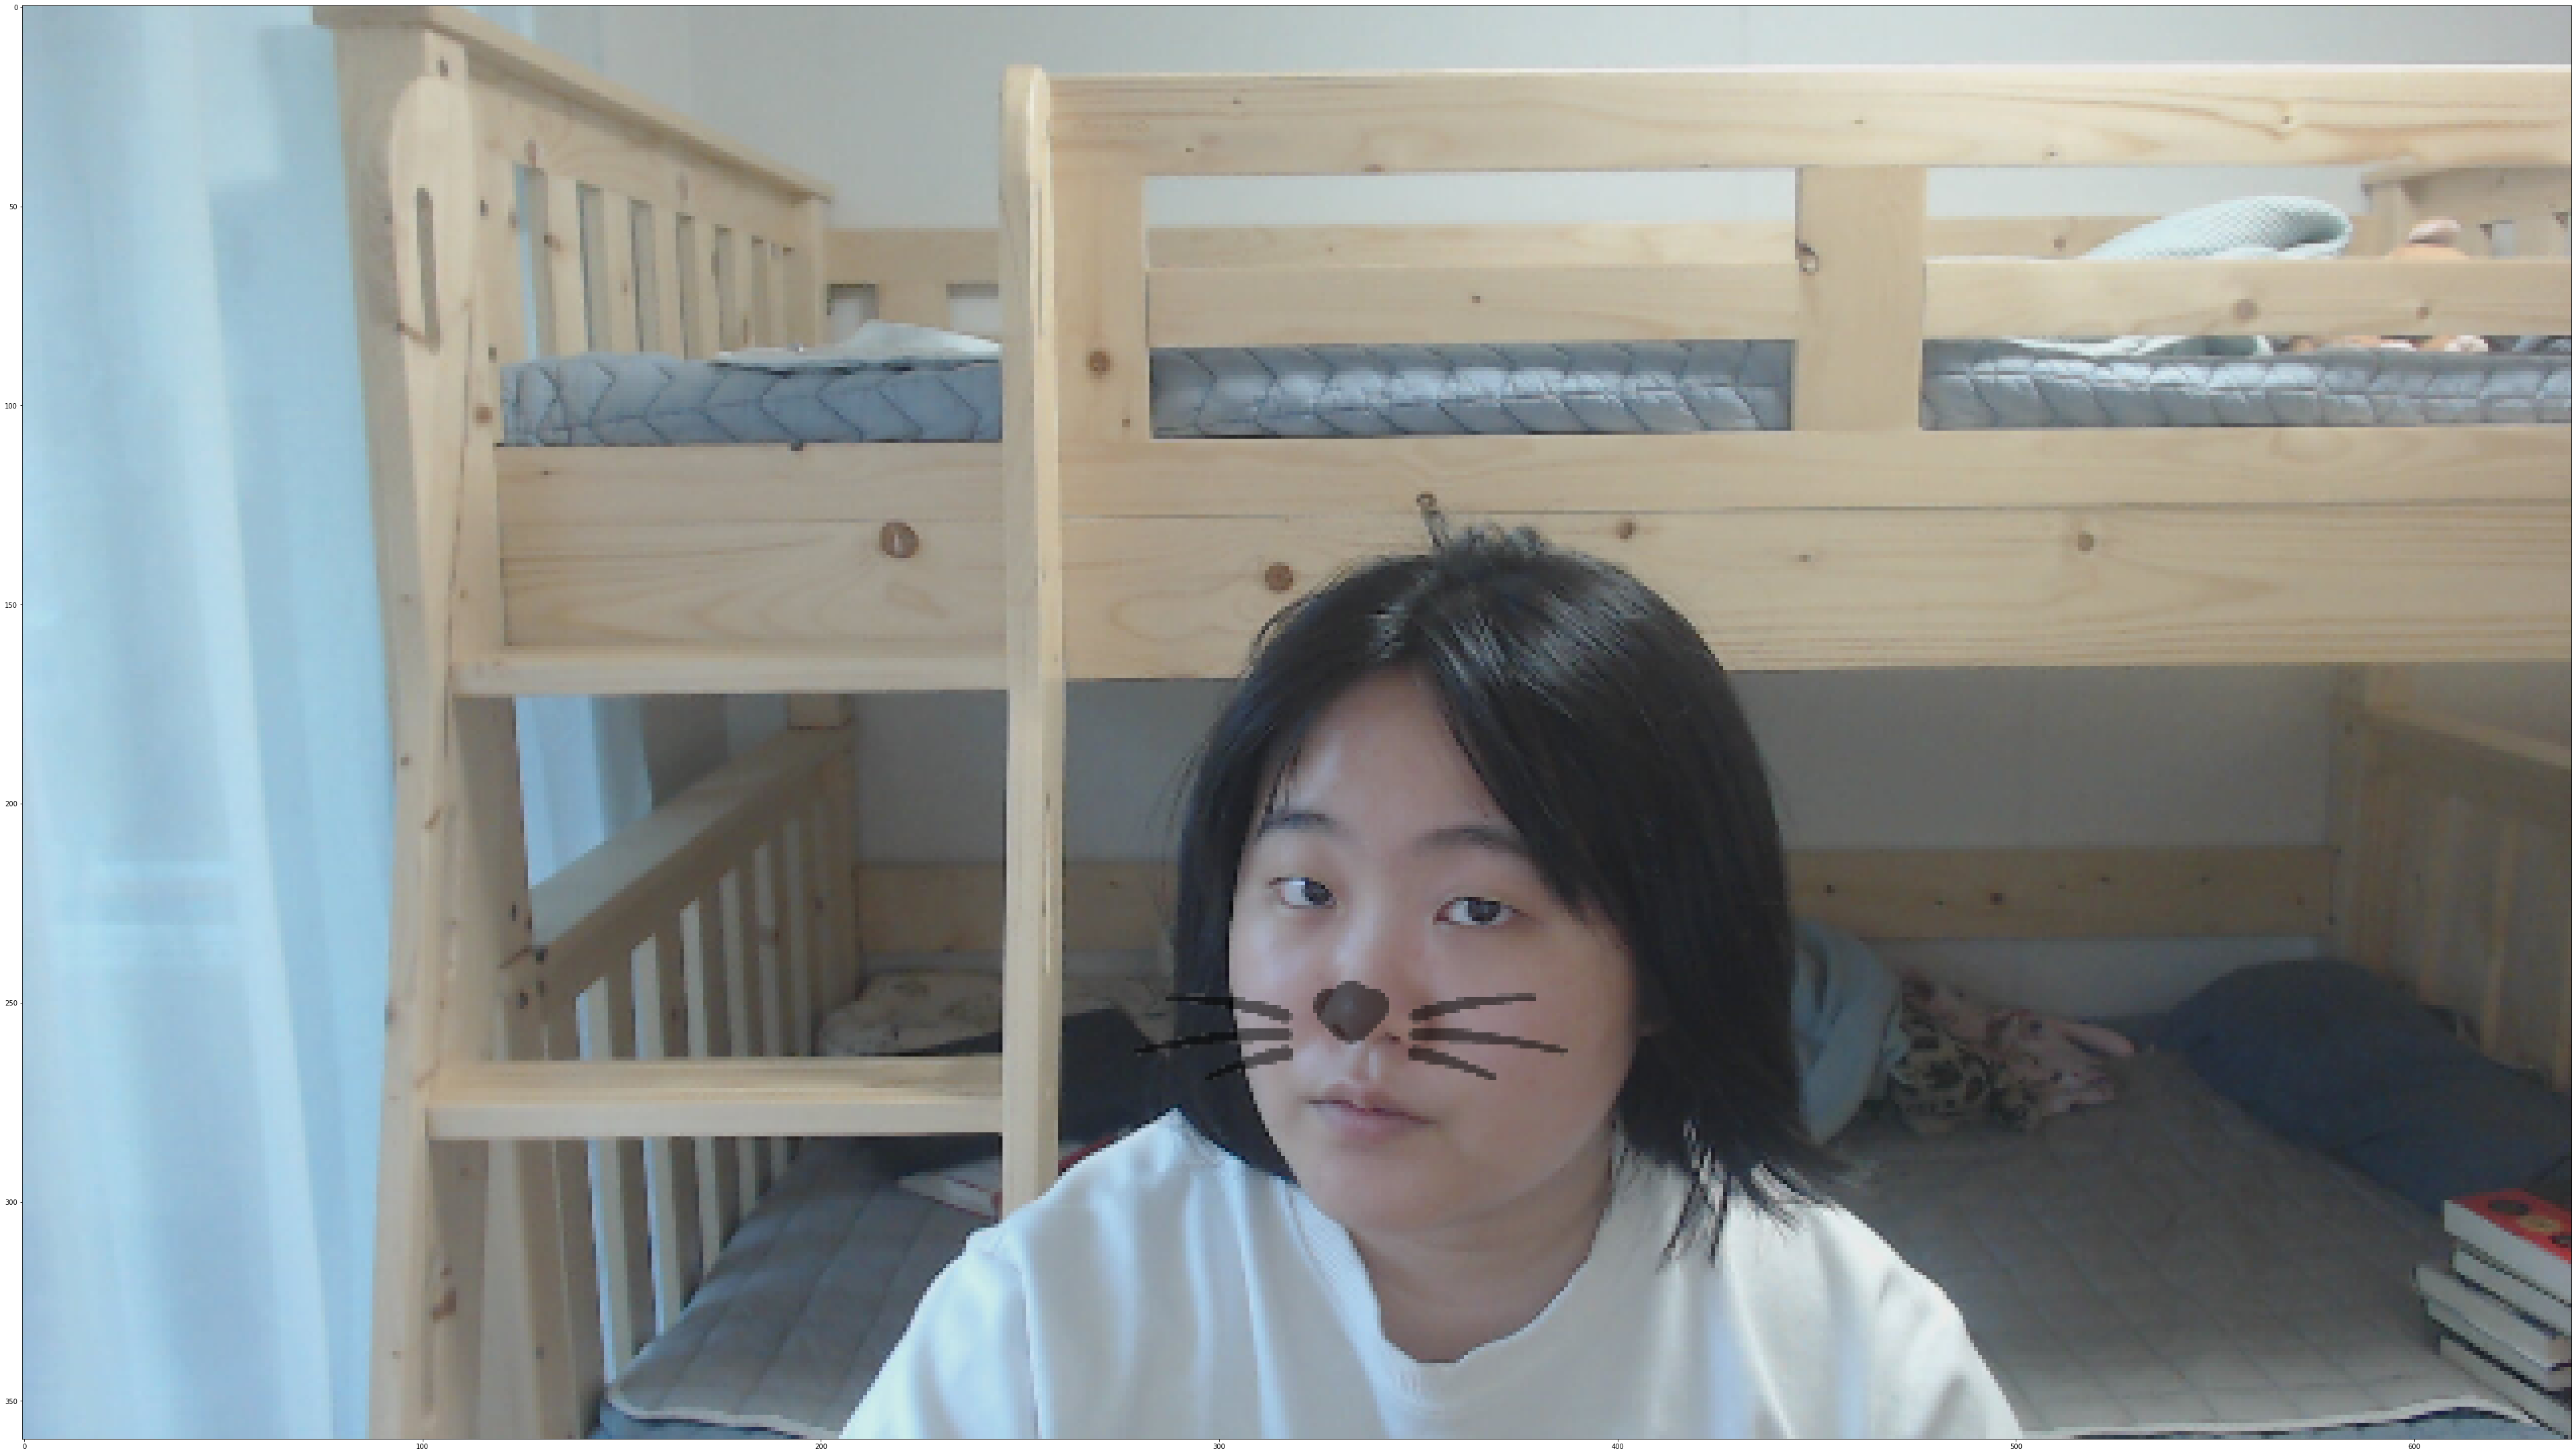

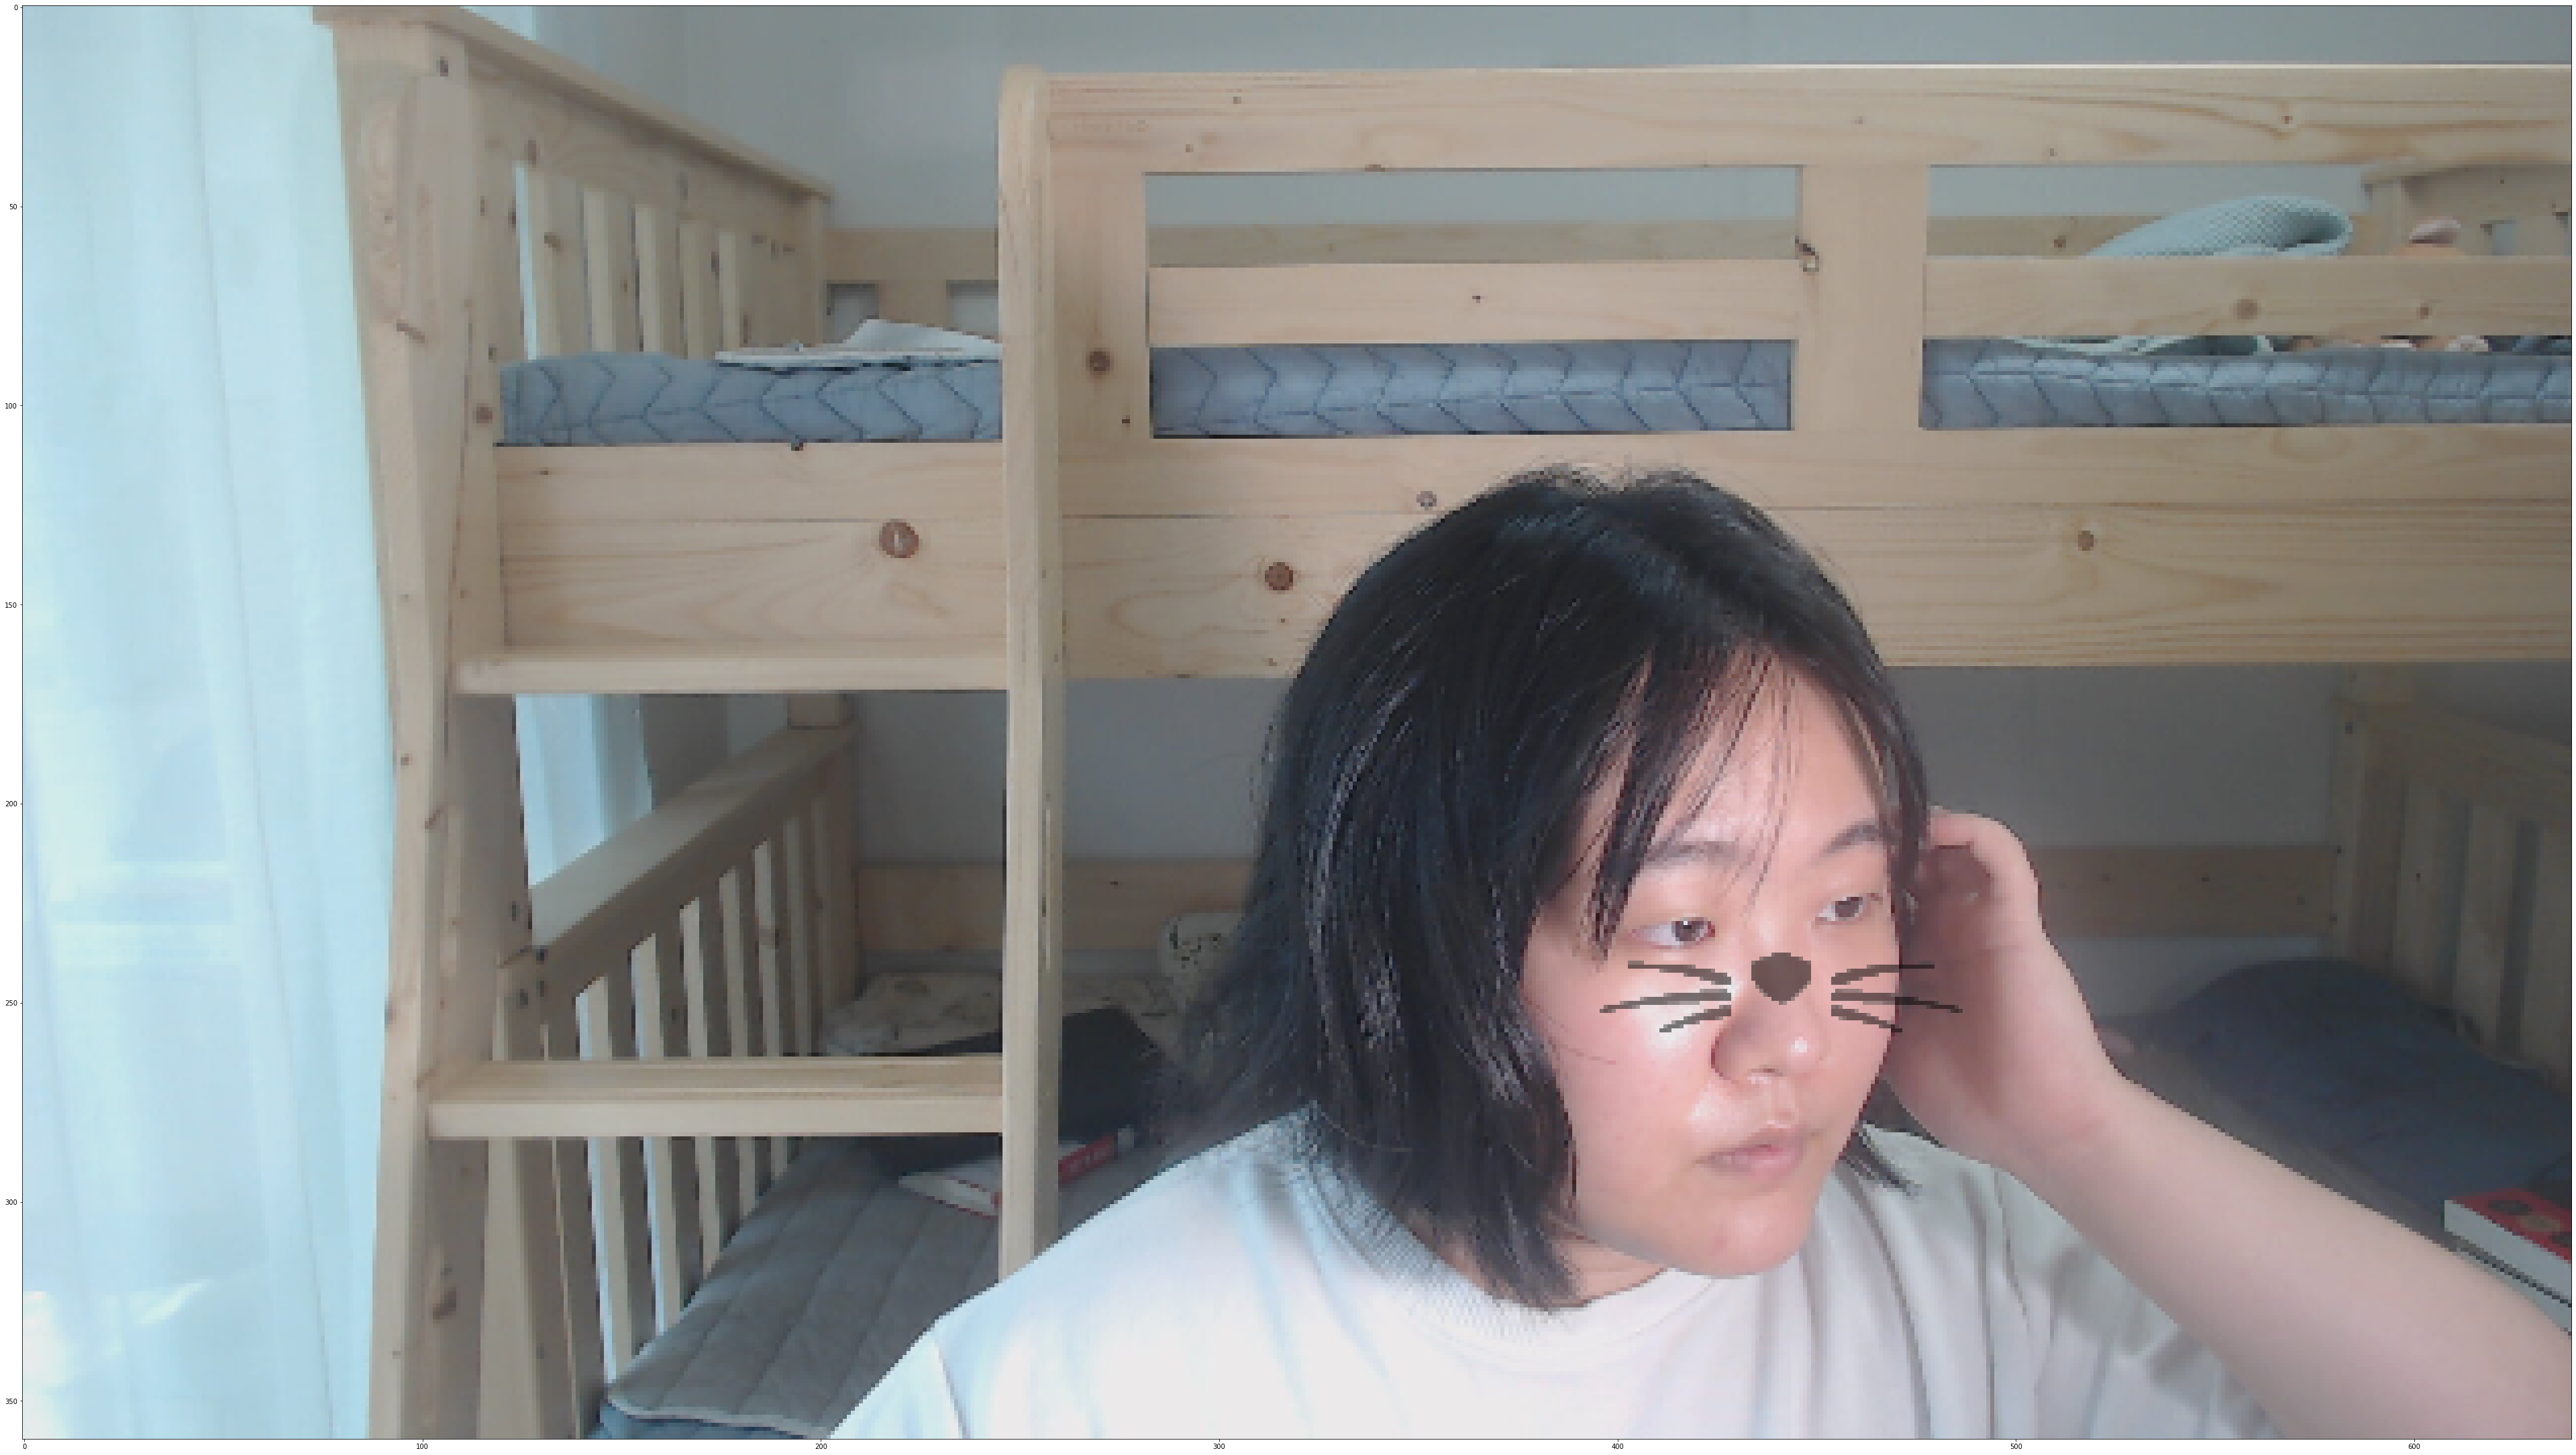

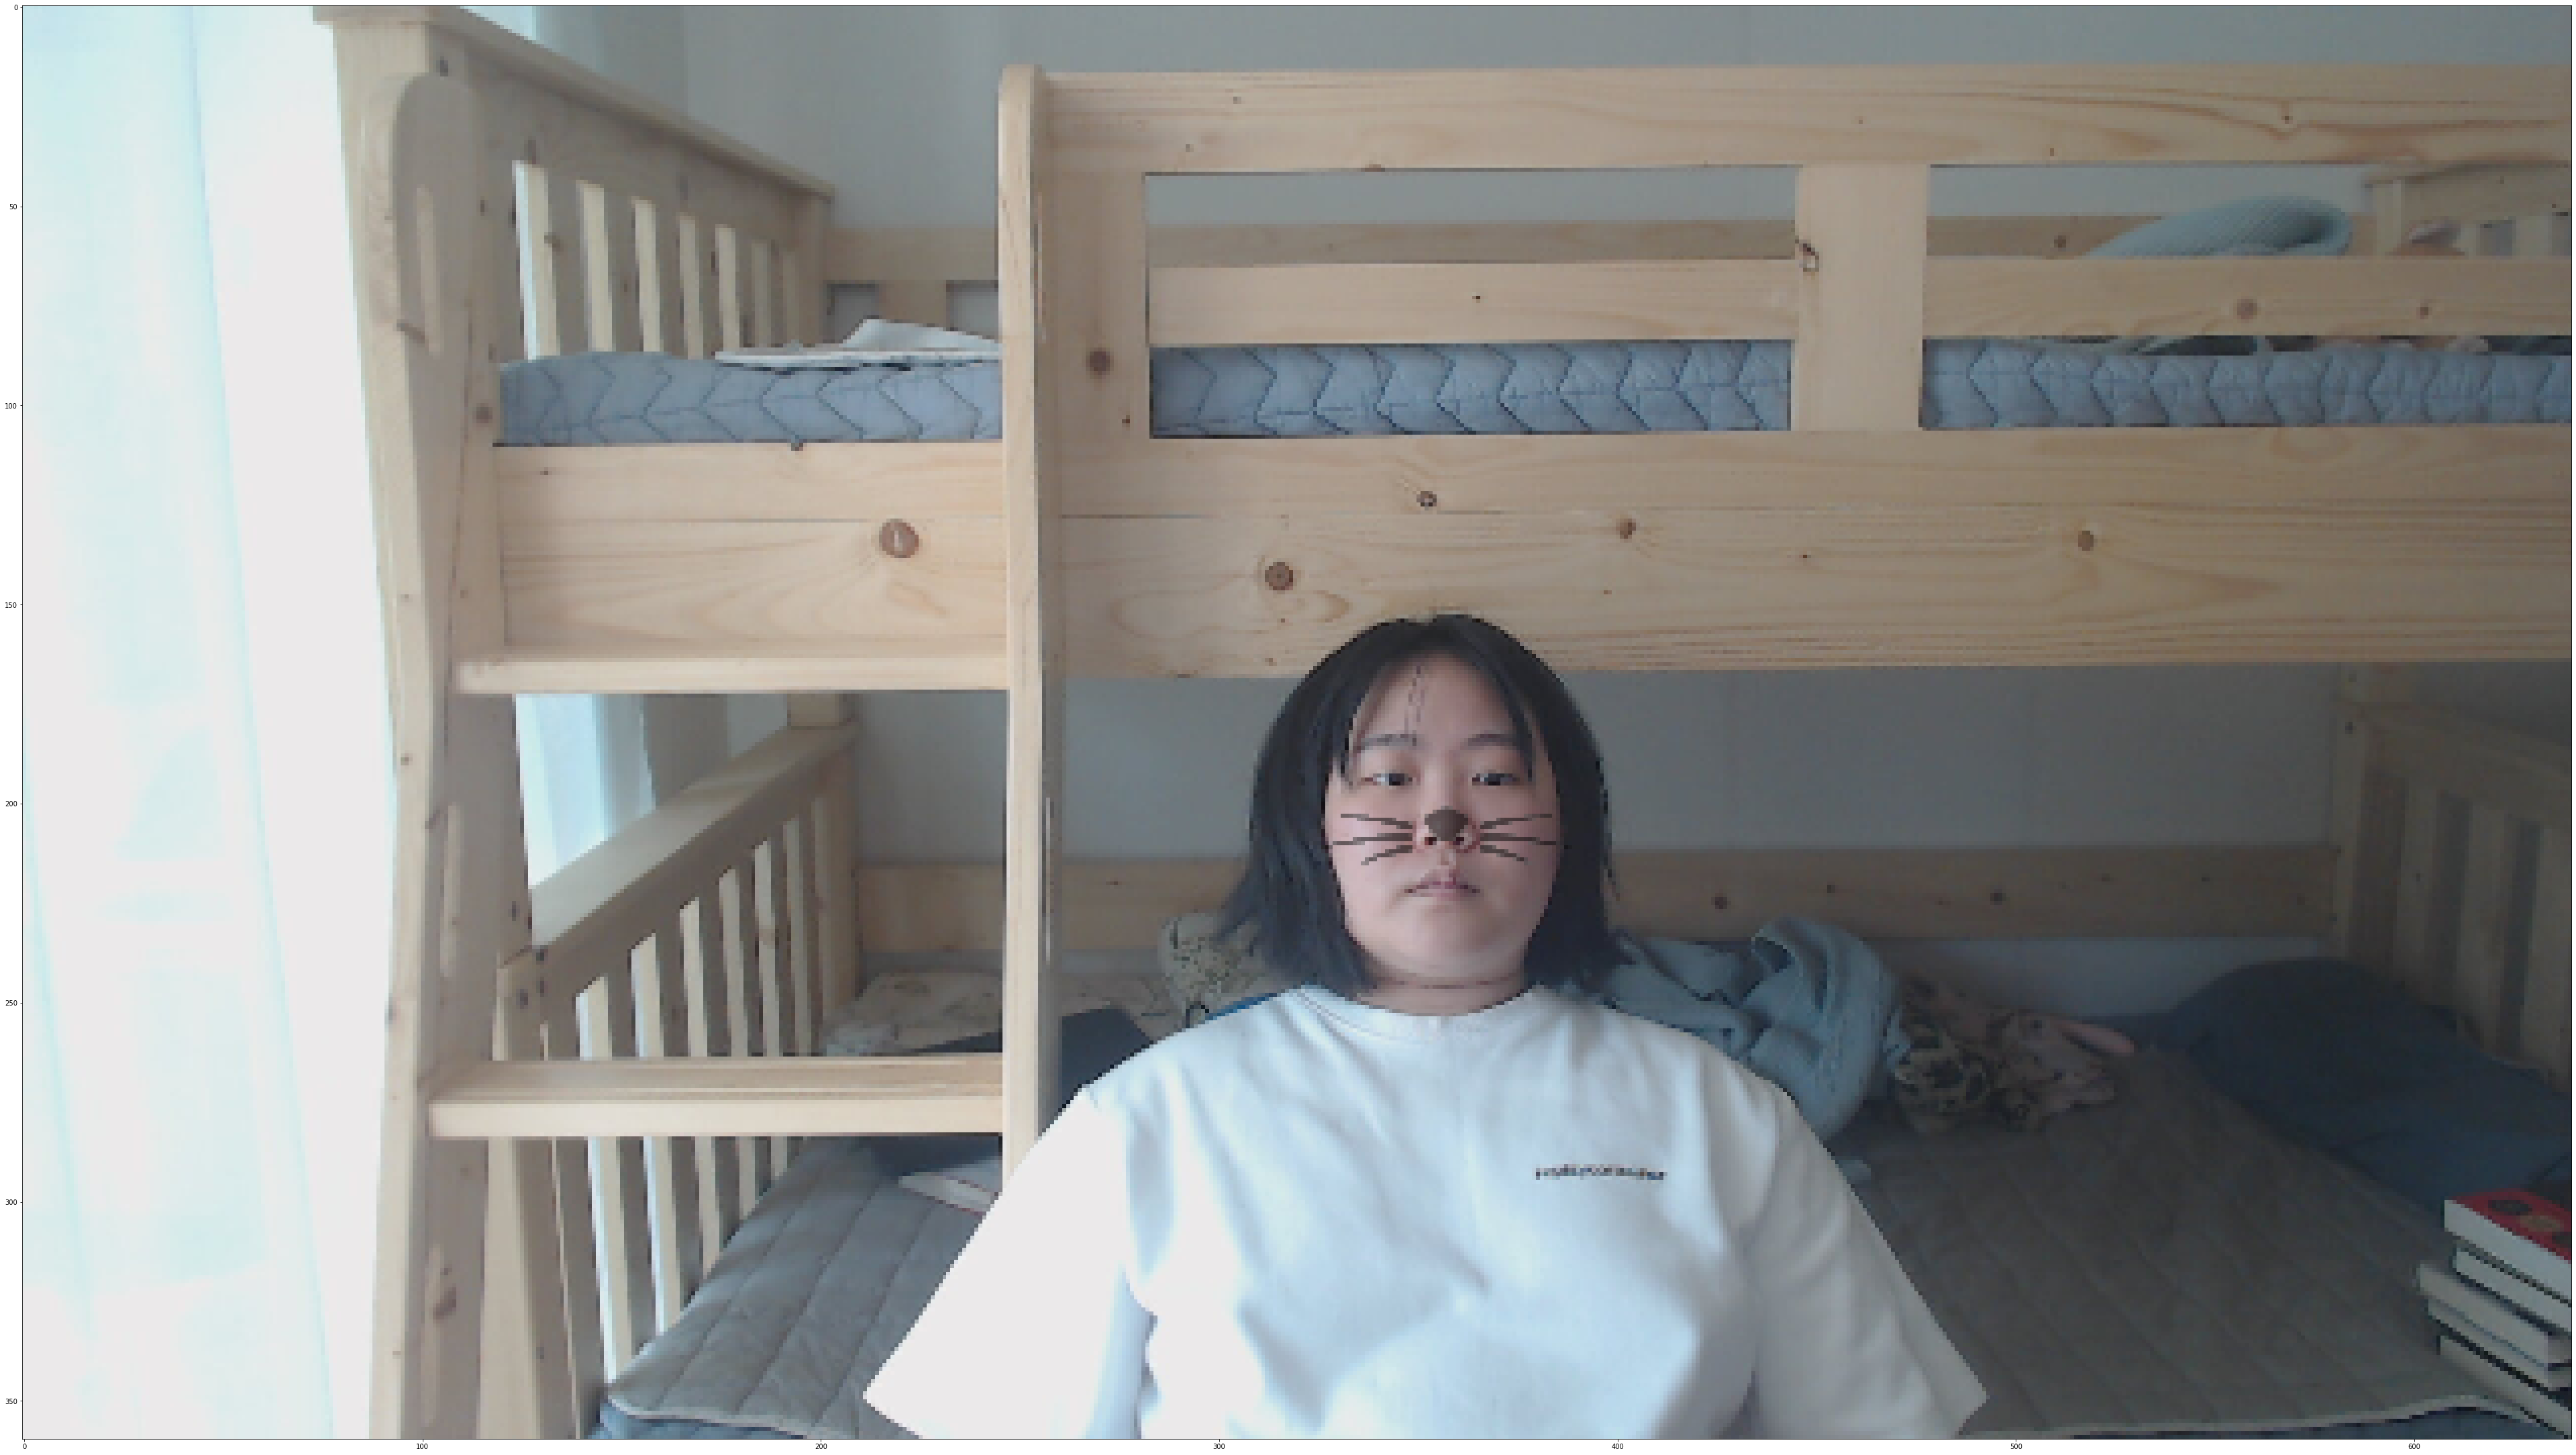

In [51]:
num_of_images = 8
detector_hog = dlib.get_frontal_face_detector()
model_path = os.getenv('HOME')+'/AIFFEL/2021-09-30/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
sticker_path = os.getenv('HOME')+'/AIFFEL/2021-09-30/images/cat-whiskers.png'
for i in range(1, num_of_images+1):
    plt.figure(figsize=(640, 360))
    plt.subplot(1, num_of_images, i)
    image_path = os.getenv('HOME')+'/AIFFEL/2021-09-30/images/Webcam/photo'+str(i)+'.jpg'
    add_whiskers(image_path, sticker_path, detector_hog, landmark_predictor)
